### MILESTONE 1

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing


In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ADSP/capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ADSP/capstone/song_data.csv')

# Understanding the Data

In [ ]:
song_df.head(10)

In [ ]:
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
count_df.isna().sum()

Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
song_df.isna().sum()

song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

In [ ]:
song_df.duplicated().sum()
song_df.drop_duplicates()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
...,...,...,...,...,...
999995,SOTXAME12AB018F136,O Samba Da Vida,Pacha V.I.P.,Kiko Navarro,0
999996,SOXQYIQ12A8C137FBB,Jago Chhadeo,Naale Baba Lassi Pee Gya,Kuldeep Manak,0
999997,SOHODZI12A8C137BB3,Novemba,Dub_Connected: electronic music,Gabriel Le Mar,0
999998,SOLXGOR12A81C21EB7,Faraday,The Trance Collection Vol. 2,Elude,0


**Observations:**

**song_df**:

1. song_id, title, release, artist_name are the object columns while the rest year is numeric

2. There are a total of **1000000 non-null observations in each of the columns except title(15 missing) and release(5 missing)**

3. There are **498** duplicated values 

**count_df**:
1. user_id, song_id are object columns while play_count is numeric, Unnamed column is not used in this analysis so will be dropped in the later part
2. There are **2000000 non null-null observations in each of the columns**. This indicates that there are **no missing values** in the data

# Data Preprocessing
**Data Tasks pre-cap**
1. Dataset song_id and count_id were merged on Song_id
2. Dropped 'Unnamed: 0' column from merged dataset 
3. Song_id and count_id columns were label encoded using label_encoder

In [ ]:
merge_df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')
merge_df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
categ = ['song_id','user_id']
merge_df[categ] = merge_df[categ].apply(label_encoder.fit_transform) 

merge_df.head()
# df_copy = merge_df.copy(deep = True) # Copying the data to another DataFrame

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:

# Get the column containing the users
users = merge_df.user_id

# # Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

merge_df = merge_df.loc[ ~ merge_df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = merge_df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1  

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
        
df_final= merge_df.loc[ ~ merge_df.song_id.isin(remove_songs)]

In [ ]:
df_final.drop(df_final[df_final['play_count'] > 5].index, inplace = True)


In [ ]:
df_final.shape

(117876, 7)

**Observation**

Rows: 117876

Columns: 7

### **Exploratory Data Analysis**

In [ ]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,117876.0,37986.496954,22041.887894,11.0,19275.0,37049.0,57152.0,76347.0
song_id,117876.0,4896.602608,2916.276544,21.0,2220.0,5023.0,7522.0,9989.0
play_count,117876.0,1.700058,1.089517,1.0,1.0,1.0,2.0,5.0
year,117876.0,1652.819683,761.726035,0.0,1994.0,2005.0,2008.0,2010.0


In [ ]:
users = df_final['user_id'].unique()
len(users)

3155

In [ ]:
songs = df_final['song_id'].unique()
len(songs)

563

In [ ]:
artist = df_final['artist_name'].unique()
len(artist)

232

**Observation**

1. Total number of unique users: 3155

2. Total number of unique songs: 563

3. Total number of unique artist: 232

**Most Interacted Users & Songs visualization**

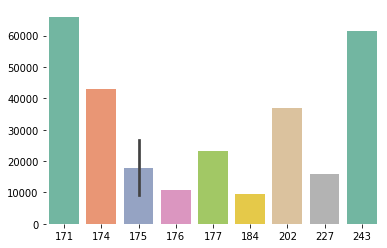

In [ ]:
Most_interacted_users = df_final.groupby('user_id')['play_count'].count().reset_index().sort_values(['play_count','user_id'],ascending = [0,1])
Most_interacted_users = Most_interacted_users[:10]

plt.figure()
labels = Most_interacted_users['user_id'].tolist()
counts = Most_interacted_users['play_count'].tolist()
sns.barplot(x = counts,y = labels, palette='Set2')
sns.despine(left=True,bottom=True)

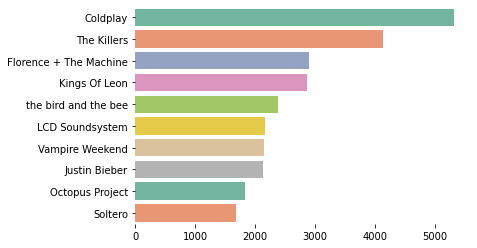

In [ ]:
Most_interacted_artist = df_final.groupby('artist_name')['play_count'].count().reset_index().sort_values(['play_count','artist_name'],ascending = [0,1])
Most_interacted_artist = Most_interacted_artist[:10]

plt.figure()
labels = Most_interacted_artist['artist_name'].tolist()
counts = Most_interacted_artist['play_count'].tolist()
sns.barplot(x = counts,y = labels, palette='Set2')
sns.despine(left=True,bottom=True)

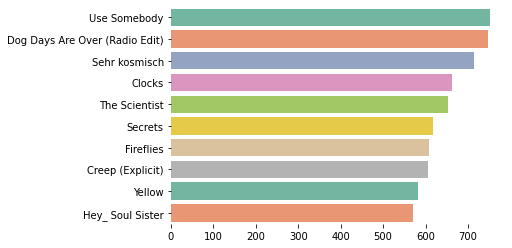

In [ ]:
Most_interacted_songs = df_final.groupby('title')['play_count'].count().reset_index().sort_values(['play_count','title'],ascending = [0,1])
Most_interacted_songs = Most_interacted_songs[:10]

plt.figure()
labels = Most_interacted_songs['title'].tolist()
counts = Most_interacted_songs['play_count'].tolist()
sns.barplot(x = counts,y = labels, palette='Set2')
sns.despine(left=True,bottom=True)

**Observation**

1. Most_interacted_users is **61472** and playcount is **243**

2. Most interacted artist is **Cold play** as shown in the figure and playcount is **5317**

3. Most interacted song is **Use Somebody** and the playcount is **751**

Distribution of song-user 

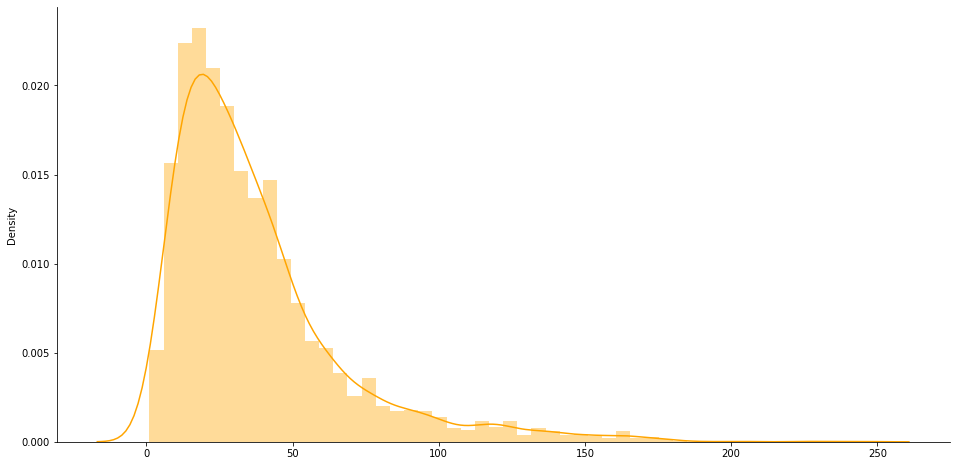

In [ ]:
song_user = df_final.groupby('user_id')['song_id'].count()

plt.figure(figsize = (16,8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

**Average songs per user**

In [ ]:
np.mean(song_user)

37.361648177496036

**Observation**

1. A user listens to an average of 37 songs
2. The above distribution shows the songs and user interaction by playcount

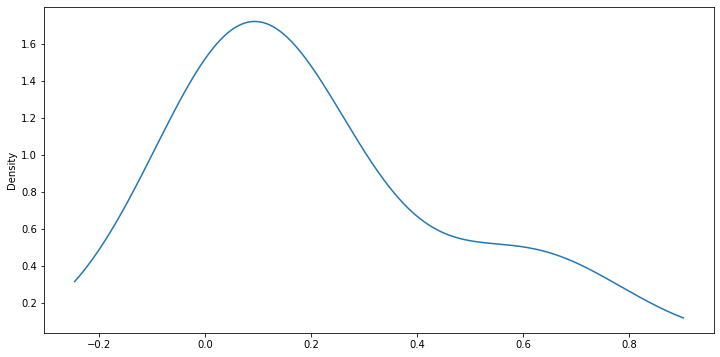

In [ ]:
plt.figure(figsize = (12, 6))

df_final['play_count'].value_counts(1).plot(kind = 'kde')

plt.show()

**Observation**


The distribution chart clearly shows that data were left skewed which is negative, the data might have upper bound. 

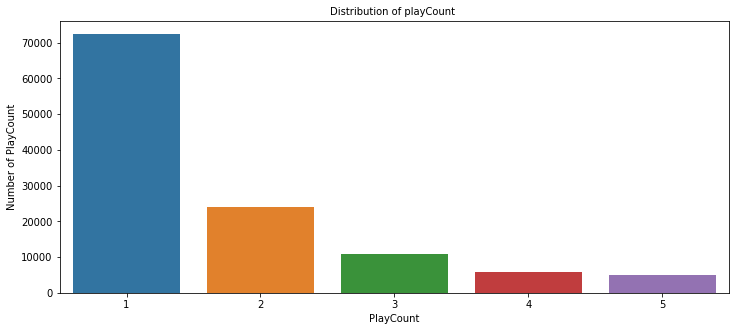

In [ ]:
# Fix the figure size
plt.figure(figsize = (12, 5))
sns.countplot(x = "play_count", data = df_final)

plt.tick_params(labelsize = 10)
plt.title("Distribution of playCount ", fontsize = 10)

# Set the xlabel of the plot
plt.xlabel("PlayCount", fontsize = 10)

# Set the ylabel of the plot
plt.ylabel("Number of PlayCount", fontsize = 10)

# Display the plot
plt.show()

Songs Played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


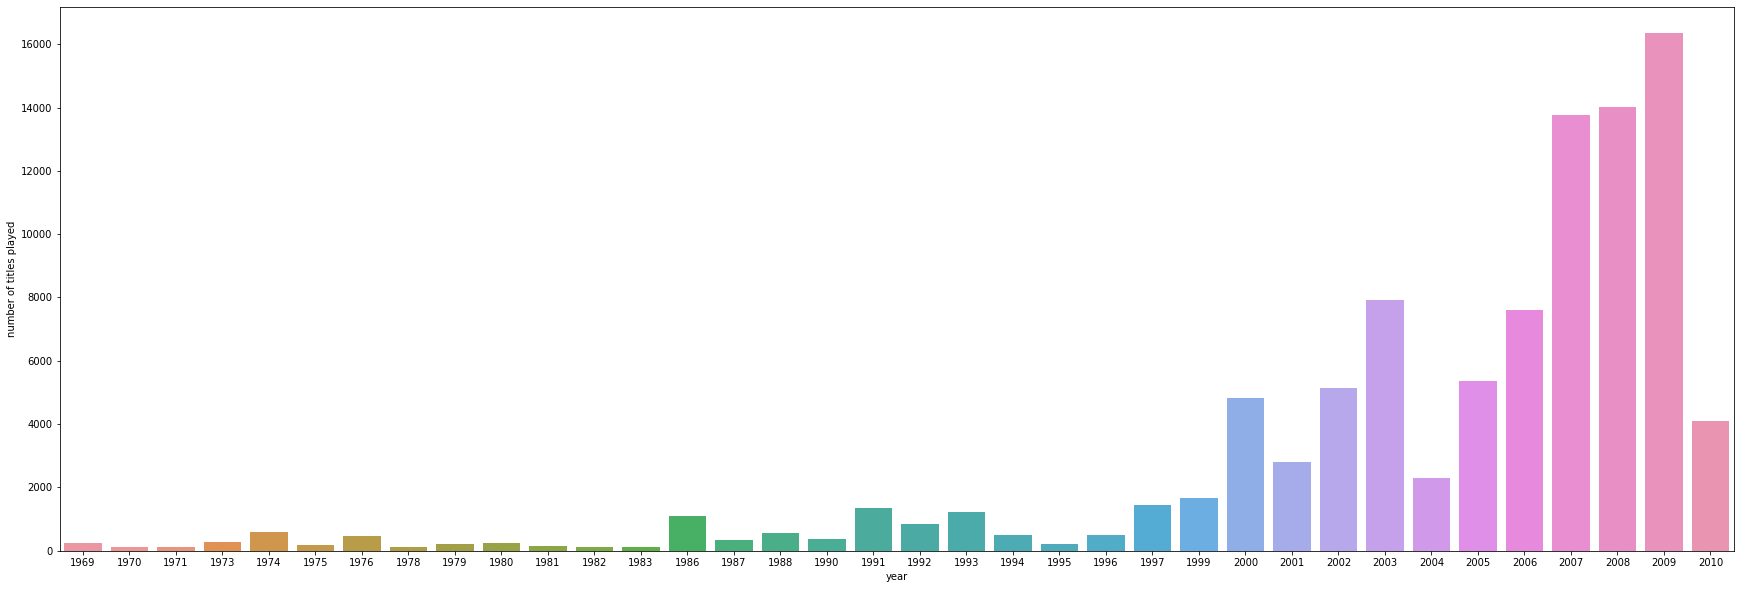

In [ ]:
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

**Observation**


1. We can clearly see that from the year 2000 the play counts gradually increasing where it denotes that internet era starts.

2. In the above distribution plot, the most title played in the year **2009** with the count of **16351**

3. Also, we can notice that immediate dip in the year 2010. This is one of the important factor to consider why its actually dropped and how we can explore on this area



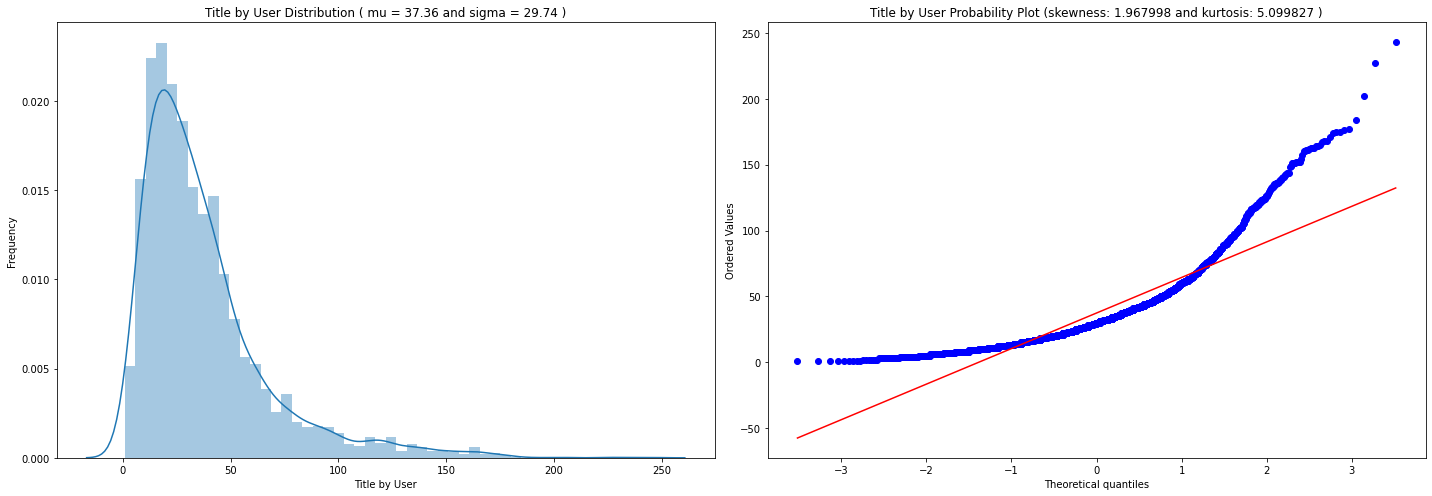

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
title,3155.0,37.361648,29.743121,1.0,17.0,30.0,47.0,243.0


In [ ]:
from scipy import stats

user_song_count_distribution = df_final[['user_id','title']].groupby('user_id').count().\
                                reset_index().sort_values(by='title',ascending = False)

def dist_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    mu = np.mean(data)
    sigma =  np.std(data)


    fig1 = fig.add_subplot(121)
    sns.distplot(data)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = stats.probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

dist_plot(user_song_count_distribution.title, 'Title by User')
user_song_count_distribution.title.describe().reset_index().T

**Observation**

From the distribution graph we can see that title by user is left skewed which means it **deviates from normal distribution**.

On average of 37 songs were played by the user.

Also in the probablity plot, red line is not aligned which indcates its **positively skewed**.

Here, we calculated **Kurtosis**(measure the data whether data is heavy_tailed or light-tailed to a normal distribution) to understand how its tailed. 

**Kurtosis** is 5 which is positive indicates that its heavy-tailed and had **outliers**

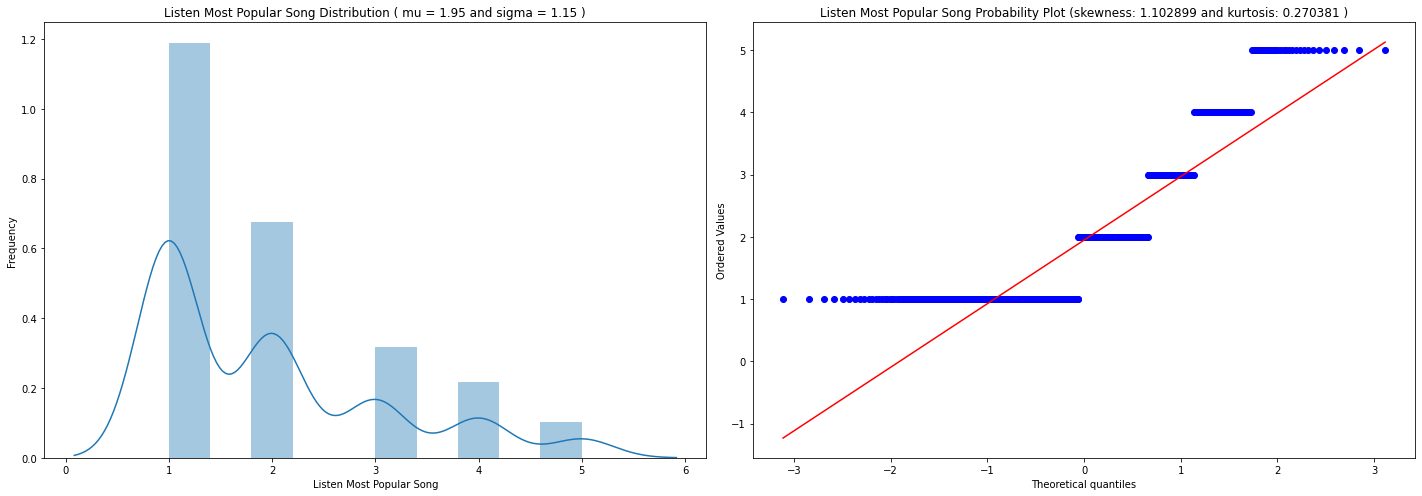

In [ ]:
dist_plot(df_final[df_final.title=="Use Somebody"].play_count,'Listen Most Popular Song')


### MILESTONE 2

In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing


In [ ]:
# Importing the original datasets
count_df = pd.read_csv('/content/drive/MyDrive/ADSP/capstone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ADSP/capstone/song_data.csv')

In [ ]:
# Importing the datasets
df_final = pd.read_csv('/content/drive/MyDrive/ADSP/capstone/df_final.csv')

### Original Dataset Preprocessing 

In [ ]:
merge_df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on='song_id', how='left')
merge_df.drop(['Unnamed: 0'], axis =1, inplace = True)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
categ = ['song_id','user_id']
merge_df[categ] = merge_df[categ].apply(label_encoder.fit_transform) 

merge_df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


##**Model 1: Popularity-Based Recommendation Systems**##

In [ ]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']     

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').count() ['play_count']       

In [ ]:
print(df_final.play_count.value_counts())

1    72473
2    23890
3    10774
4     5874
5     4865
Name: play_count, dtype: int64


In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


In [ ]:
 #function to find top n songs

def top_n_songs(final_play, n, min_play):
    
    # Finding products with minimum number of interactions
    recommendations = final_play[final_play['play_freq'] >= min_play]
    
    # Sorting values with respect to average rating 
    recommendations =  recommendations.sort_values(by='avg_count', ascending=False)
    
    return recommendations.index[:n]

In [ ]:
print(top_n_songs(final_play,10,50))

Int64Index([7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614], dtype='int64', name='song_id')


## **Collaborative Filtering Method**

In [ ]:
!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366451 sha256=6cd9aa9947438bacccb895f22ef5ab07ab1c4ad7c2efc503fc9999b96f156027
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

###**Base-Line Model - User-user Similarity based Recommendation System**


In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

- Below function takes the recommendation model as input and gives the precision@k, recall@k, and F1-score@k for that model.
- To compute precision and recall, top k predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

- To compute precision and recall, a threshold of 1.5 and k value of 30 is taken for the recommended and relevant ratings. When changing thershold value it might affect the Z-score value.
- In the present case, precision and recall both need to be optimized as the service provider would like to minimize both the losses discussed above. 
- Hence, the correct performance measure is the F_1 score.

In [ ]:
# Instantiating Reader scale with expected rating scale 
reader = Reader(rating_scale= (0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4

- Changing test size will impact the baseline score as well as predicted rate.
- Increasing testset size might leads to **underfitting** and decreasing testset size might leads to **overfitting**. 

In [ ]:
from pandas.core.common import random_state
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options,verbose=False,random_state=1)  

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user) 

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations:**

Baseline Model uses **Cosine Similarity** as similarity function.

Our Baseline model RMSE is 1.0.

Precison is 0.39 which means 35% of recommended items that are relevant

Recall is 0.69 which means 69% of relevant items are recommended

F_1 score is 0.50 which means most of the items recommanded were relevant and relevant items were recommanded



In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958, 1671, r_ui = 2, verbose = True) 

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

**The above output shows that the actual rating for this user-item pair is 2, and the predicted rating is 1,8 by this user-user-similarity-based baseline model.**

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3466, r_ui=2, verbose=True)

user: 6958       item: 3466       r_ui = 2.00   est = 1.59   {'actual_k': 23, 'was_impossible': False}


Prediction(uid=6958, iid=3466, r_ui=2, est=1.5892781878242401, details={'actual_k': 23, 'was_impossible': False})

- The **predicted rating for this user is around 1.64** based on this **user-user similarity-based baseline model**.

###  **Hyperparameter Tuning - GridSearch CV**


In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.046798797550471
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


**Final model on the Tuned Parameters using Grid Search Cross-Validation**

In [ ]:
from pandas.core.common import random_state
# Build the default user-user-similarity model
sim_options = {'name': 'pearson_baseline',
               'user_based':True,
               'min_support':2}

# KNN algorithm is used to find desired similar items
sim_user_user_optimised = KNNBasic(sim_options=sim_options,k=30,min_k=9,verbose=False,random_state=1)  

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_optimised.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user_optimised) 

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations:**

We can observe that after tuning hyperparameters using GridSearch CV, **F_1 score** of the tuned model is 0.52. And there is **no change** in the score. 

Also, there is a slight **improvement** in **precision** and **recall** compared to baseline model.  

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimised.predict(6958, 1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimised.predict(6958, 3466, r_ui=2, verbose=True)

user: 6958       item: 3466       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3466, r_ui=2, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations**

- For an unknown song the model is predicting a value of **1.70** which is slightly high compared to baseline model(**1.6**).

**5 most similar songs to the inner id 0**

In [ ]:
# Here, 0 is the inner id of the above user
sim_user_user_optimised.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

### **Implementing the recommendation algorithm**

we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')
    
    # Extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimised)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcount'])

,song_id,predicted_playcount
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations**

Above table shows the recommendation for user_id : 6958 with similarity based recommendation engine.

### **Correcting the Ratings and Ranking the above products**

In [ ]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_playcount' ]), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_playcount'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs  = ranked_songs.sort_values('corrected_ratings', ascending = False)

  
  return ranked_songs

In the above-corrected rating formula, we can add the quantity 1/np.sqrt(n) instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity, as there are some items with ratings 5 and we can't have a rating more than 5 for a an item.

In [ ]:
ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_playcount,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


### **Item Item Similarity-based collaborative filtering recommendation systems**

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


The baseline model calculated based on **Cosine** similarity which is giving 0.39. We will try to improve this later by using GridSearchCV by tuning different hyperparameters of this algorithm.

In [ ]:
df_final[df_final.song_id == 1671].user_id.unique()

array([ 6958, 45386, 22749, 51415, 74334, 15700, 18349, 33280, 41799,
       54866, 23516, 21117, 63702, 27240, 14538, 69334, 44790, 45349,
       70987, 53145, 11453, 49747,  6141, 20797, 30305, 55566, 57374,
        1035, 52134, 23705, 60129, 58757, 11010, 18409, 28007, 59672,
        7670, 20809, 25351, 15644, 21045, 68061, 35160, 55323, 31451,
        4848, 23790, 41878, 69900, 53691, 43177, 52662, 72448, 60644,
       60518, 40802, 34410, 17434, 56574, 62989, 15634, 71179, 50849,
       63669, 71481, 75934, 38654, 61513, 29038, 59307, 42216, 66345,
       25298,  9975, 52400, 15984, 25051,  2396, 71060,  1604, 33403,
       60008, 39281, 23777, 61358, 48538, 35101, 44726, 23099, 60923,
       70967, 23148, 34385, 69297, 69722, 17793,  1602, 37727, 61794,
       48175, 29786, 72397, 60215, 45152, 45401, 44865, 10267, 43539,
       16915, 72912, 67874, 29527, 64985, 48845, 17932, 48976, 29040,
       40358, 16076, 62379, 11799, 10218, 17050,  9193, 19263, 52192,
       23856, 45335,

In [ ]:
df_final['user_id'].unique()

array([ 6958, 27018, 55837, ..., 12960, 71830, 47786])

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

The above output shows that the actual rating for this user-item pair is 2 and the predicted rating is **1.36** by the item-item-similarity-based baseline model.

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item.predict(47786, 1671, r_ui=2, verbose=True)

user: 47786      item: 1671       r_ui = 2.00   est = 1.94   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=47786, iid=1671, r_ui=2, est=1.9365719326237714, details={'actual_k': 40, 'was_impossible': False})

As we can see the **predicted** rating for this user-item pair is good (around **1.9**) based on the item-item similarity-based baseline model.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0246404915071112
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [ ]:
from pandas.core.common import random_state
# Build the default user-user-similarity model
sim_options = {'name': 'pearson_baseline',
               'user_based':False,
               'min_support':2}

# KNN algorithm is used to find desired similar items
sim_item_item_optimised = KNNBasic(sim_options=sim_options,k=30,min_k=6,verbose=False,random_state=1)  

# Train the algorithm on the trainset, and predict play_count for the testset
sim_item_item_optimised.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_item_item_optimised) 

RMSE: 1.0328
Precision:  0.408
Recall:  0.665
F_1 score:  0.506


**Observations:**

The F_1 score of the baseline model which is calculated based on **Pearson** similarity and the F_1 Score for baseline model is **0.39** and tuned model **(GridSearch CV)** is **0.50** which showing good improvement in the score and we can see that RMSE and Precision were improved as well. Also model performance has improved compared to baseline model.

In overall model performance after hyperparameter tuning is better than baseline model.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 
sim_item_item_optimised.predict(6958, 1671, r_ui=2, verbose=True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_item_item_optimised.predict(6958, 3466, r_ui=2, verbose=True)

user: 6958       item: 3466       r_ui = 2.00   est = 1.70   {'actual_k': 7, 'was_impossible': False}


Prediction(uid=6958, iid=3466, r_ui=2, est=1.702653515292856, details={'actual_k': 7, 'was_impossible': False})

**Observations**

There is a drop in predicted value after model tuning, so this approach is unstable to propose for prediction.

In [ ]:
# Here, 0 is the inner id of the above user
sim_item_item_optimised.get_neighbors(0, 5)

[124, 523, 173, 205, 65]

In [ ]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimised)

In [ ]:
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_playcount'])

,song_id,predicted_playcount
0,2342,2.653903
1,5101,2.386577
2,139,2.313727
3,7519,2.270864
4,8099,2.212702


In [ ]:
ranking_songs(recommendations,final_play)

,song_id,play_freq,predicted_playcount,corrected_ratings
4,2342,111,2.653903,2.558987
2,5101,130,2.386577,2.298871
3,139,119,2.313727,2.222057
1,7519,168,2.270864,2.193712
0,8099,275,2.212702,2.152399


### **Model Based Collaborative Filtering - Matrix Factorization**

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


From the matrix factorization model F_1 is slightly higher than item-item similarity-based recommendation system and 0.50 in optimisied item-item-similarity based recommandation system which is same as matrix factorization - 0.50.

**Based on the observation, we can say that SVD and item-item similarity-based recommandation model performance were same and User-user similarity recommendation system prediction rate is slight higher than other models.**

In [ ]:
df_final[df_final.song_id == 1671].user_id.unique()

array([ 6958, 45386, 22749, 51415, 74334, 15700, 18349, 33280, 41799,
       54866, 23516, 21117, 63702, 27240, 14538, 69334, 44790, 45349,
       70987, 53145, 11453, 49747,  6141, 20797, 30305, 55566, 57374,
        1035, 52134, 23705, 60129, 58757, 11010, 18409, 28007, 59672,
        7670, 20809, 25351, 15644, 21045, 68061, 35160, 55323, 31451,
        4848, 23790, 41878, 69900, 53691, 43177, 52662, 72448, 60644,
       60518, 40802, 34410, 17434, 56574, 62989, 15634, 71179, 50849,
       63669, 71481, 75934, 38654, 61513, 29038, 59307, 42216, 66345,
       25298,  9975, 52400, 15984, 25051,  2396, 71060,  1604, 33403,
       60008, 39281, 23777, 61358, 48538, 35101, 44726, 23099, 60923,
       70967, 23148, 34385, 69297, 69722, 17793,  1602, 37727, 61794,
       48175, 29786, 72397, 60215, 45152, 45401, 44865, 10267, 43539,
       16915, 72912, 67874, 29527, 64985, 48845, 17932, 48976, 29040,
       40358, 16076, 62379, 11799, 10218, 17050,  9193, 19263, 52192,
       23856, 45335,

In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, r_ui=2, verbose=True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.012782830493335
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
# Build the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2,random_state = 1)

# Train the algorithm on the train set
svd_optimized=svd_optimized.fit(trainset)


# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations:**

There is no significant difference between baseline model and optimised model.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 6, verbose = True)

user: 6958       item: 1671       r_ui = 6.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=6, est=1.3432395286125098, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3466, r_ui=2, verbose=True)

user: 6958       item: 3466       r_ui = 2.00   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3466, r_ui=2, est=1.564460854158407, details={'was_impossible': False})

**Observations**

There is no change in the predicted value even applying with optimsed model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_playcount,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


## **Cluster Based Recommendation System**

In clustering-based recommendation systems, we explore the similarities and differences in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model

cocluster = CoClustering(n_cltr_u=3, n_cltr_i=3, n_epochs=20, random_state=1, verbose=False)

cocluster.fit(trainset)

precision_recall_at_k(cocluster)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


Compared to previous models, Cluster based recommendation system give similar values. F-1 score is 47%.

In [ ]:
# Making prediction for user_id 6958 and song_id 1671
cocluster.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
cocluster.predict(6958, 3232, r_ui = 2, verbose = True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
type(data)

surprise.dataset.DatasetAutoFolds

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0627508697877588
{'n_cltr_u': 5, 'n_cltr_i': 6, 'n_epochs': 10}


In [ ]:
# Train the tuned Coclustering algorithm

cocluster_optimised = CoClustering(n_cltr_u=5, n_cltr_i=5, n_epochs=10, random_state=1, verbose=False)

cocluster_optimised.fit(trainset)

precision_recall_at_k(cocluster_optimised)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observation:**

There is no significant difference between baseline model and optimised model.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
cocluster_optimised.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9108882530486497, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
cocluster_optimised.predict(6958, 3232, r_ui = 2, verbose = True)

user: 6958       item: 3232       r_ui = 2.00   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=2, est=1.2366916027865822, details={'was_impossible': False})

**Observation:**


There is a no change in the predicted value infact optimised model lowers the prediction rate.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
clustering_recommendations = get_recommendations(df_final, 6958, 5, cocluster_optimised)
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_playcount,corrected_ratings
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


## **Content Based Recommendation Systems**

Content-Based recommender system tries to guess the features or behavior of a user based on previous transaction of the user. Informations like music title, artist name, release will help to predict what kind of music the particular user likes, its purely based on user's history.

- During recommendation, the similarity metrics are calculated from the item’s feature vectors and the user’s preferred feature vectors from his/her previous records. Then, the top few are recommended.

In [ ]:
df_small = df_final
df_small.columns

Index(['Unnamed: 0', 'user_id', 'song_id', 'play_count', 'title', 'release',
       'artist_name', 'year'],
      dtype='object')

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
# merge_df.count()
df_small["text"] = df_small[['title', 'release','artist_name']].agg('-'.join, axis=1)


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small.loc[:, ['user_id', 'song_id', 'play_count','title','text']] 

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence-Distillation-Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine-Sawdust-The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)-Vampire Weekend-Vamp...
They Might Follow You,6958,703,1,They Might Follow You-Tiny Vipers-Tiny Vipers
Monkey Man,6958,719,1,Monkey Man-You Know I'm No Good-Amy Winehouse


In [ ]:
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')
# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf.fit_transform(df_small['text'].values)

In [ ]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):
    
    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly',cosine_sim)

[509, 234, 345, 394, 374, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']

**Observations:**

Based on our cluster recommendation system, we can recommend songs to the user based on their similar listened songs.  

In the above recommendation function, whoever listened the song 'Lear to Fly' might like to hear the below list,

 'Everlong',

 'The Pretender',

 'From Left To Right',

 'Lifespan Of A Fly',

 'Who Let You Go?',

 'Under The Gun',

 'I Need A Dollar',

 'Feel The Love',

 'All The Pretty Faces',

 'Bones'

### **Model Comaprison Table**

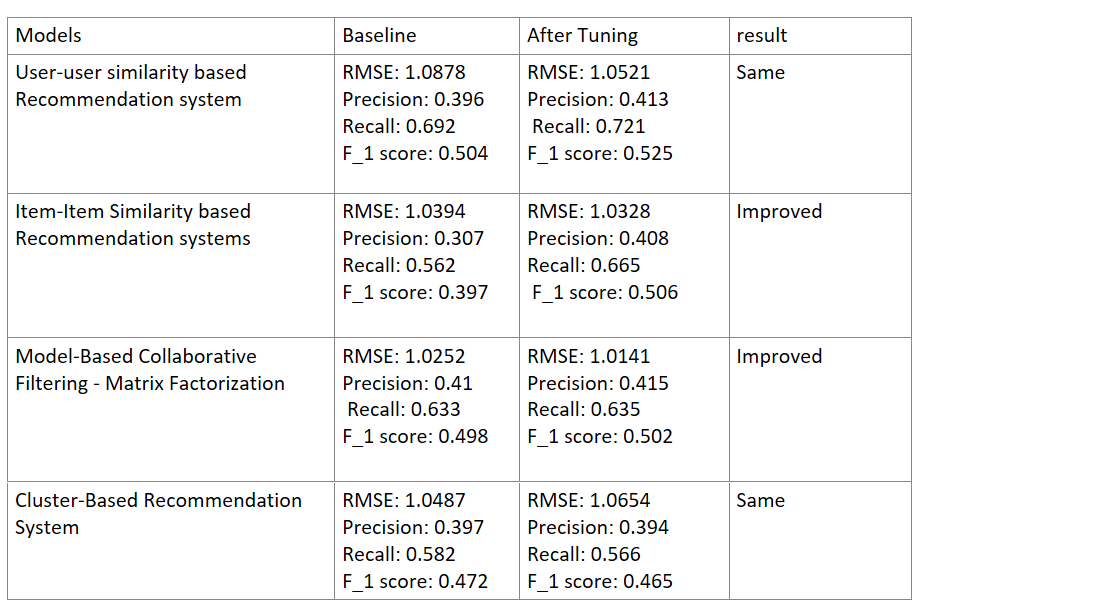

## **Conclusion and Recommendations:** 

**Refined Insights**

- Collaborative filtering System gives the recommendation based on the other users’ reactions while recommending a particular user.

- It notes which items a particular user likes and the items that the users with behavior and liking like user likes, to recommend items to that user. 
- For the given music dataset, we can recommend similar songs to the user and vice-versa.

**Comparison of various techniques and their relative performance**

- Each model performance is based on the user similarity measure and most of the models have similar F-1 scores. The f-1 score is considered the harmonic mean of precision and recall.

- Compared to other models, User-User Similarity based recommendation system scores a high F-1 score of 52%

- Tuning helps the model to improve its performance, in our case we used GridSearch CV with a cross-fold validation technique and the model gives a slight improvement in the prediction.

- But we can improve further with different tuning parameters.

**Proposal for the final solution design** 

- Based on the model evaluation and F-1 score, **Collaborative filtering Recommendation System ** should be used to predict the recommendations.

- The model performance can be improved further with different trainset and tuning parameters.

- Also, there is a possibility to use a Content-based Filtering Recommendation System when we consider user history information.






In [9]:
%%shell
jupyter nbconvert --to html /content/Recommendation_Systems_FinalSubmission.ipynb

[NbConvertApp] Converting notebook /content/Recommendation_Systems_FinalSubmission.ipynb to html
[NbConvertApp] Writing 912781 bytes to /content/Recommendation_Systems_FinalSubmission.html
